<a href="https://colab.research.google.com/github/stacy4602/Pokemon-Legendary-Prediction/blob/main/Pokemon_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import sklearn
import os
import matplotlib.pyplot as plt
pd.options.plotting.backend = "plotly"

Reading Data

In [80]:
df = pd.read_csv('/content/pokemon.csv', index_col='pokedex_number')
df.head()
df.tail()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,name,percentage_male,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
pokedex_number,,,,,,,,,,,,,,,,,,,,,
797,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,Celesteela,NaN,107,101,61,steel,flying,999.9,7,1
798,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,Kartana,NaN,59,31,109,grass,steel,0.1,7,1
799,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,Guzzlord,NaN,97,53,43,dark,dragon,888.0,7,1
800,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,Necrozma,NaN,127,89,79,psychic,NaN,230.0,7,1
801,['Soul-Heart'],0.25,0.5,0.0,1.0,0.5,1.0,2.0,0.5,1.0,...,Magearna,NaN,130,115,65,steel,fairy,80.5,7,1


In [3]:
print("Shape of our dataframe:")
df.shape

Shape of our dataframe:


(801, 40)

**Exploratory Data Analysis**

In [4]:
print("All columns we have:\n " ,df.columns.tolist())

All columns we have:
  ['abilities', 'against_bug', 'against_dark', 'against_dragon', 'against_electric', 'against_fairy', 'against_fight', 'against_fire', 'against_flying', 'against_ghost', 'against_grass', 'against_ground', 'against_ice', 'against_normal', 'against_poison', 'against_psychic', 'against_rock', 'against_steel', 'against_water', 'attack', 'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate', 'classfication', 'defense', 'experience_growth', 'height_m', 'hp', 'japanese_name', 'name', 'percentage_male', 'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg', 'generation', 'is_legendary']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 1 to 801
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

Dividing columns into categories - Numerical , Object , Null






In [6]:
num_cols = list(df.select_dtypes(exclude=['object']).columns)
obj_cols = list(df.select_dtypes(include=['object']).columns)
null_cols = df.columns[df.isnull().any()]

print("Number of numeric columns:", len(num_cols))
print("Number of object columns:", len(obj_cols))
print("Number of null columns:", len(null_cols))

Number of numeric columns: 33
Number of object columns: 7
Number of null columns: 4


In [7]:
df[null_cols].head()

,height_m,percentage_male,type2,weight_kg
pokedex_number,,,,
1,0.7,88.1,poison,6.9
2,1.0,88.1,poison,13.0
3,2.0,88.1,poison,100.0
4,0.6,88.1,NaN,8.5
5,1.1,88.1,NaN,19.0


In [8]:
print("no of null values per column:")
df[null_cols].isnull().sum()

no of null values per column:


height_m            20
percentage_male     98
type2              384
weight_kg           20
dtype: int64

In [9]:
df.type2.fillna("None", inplace=True)

## Object Columns

In [10]:
df[obj_cols].head()

,abilities,capture_rate,classfication,japanese_name,name,type1,type2
pokedex_number,,,,,,,
1,"['Overgrow', 'Chlorophyll']",45,Seed Pokémon,Fushigidaneフシギダネ,Bulbasaur,grass,poison
2,"['Overgrow', 'Chlorophyll']",45,Seed Pokémon,Fushigisouフシギソウ,Ivysaur,grass,poison
3,"['Overgrow', 'Chlorophyll']",45,Seed Pokémon,Fushigibanaフシギバナ,Venusaur,grass,poison
4,"['Blaze', 'Solar Power']",45,Lizard Pokémon,Hitokageヒトカゲ,Charmander,fire,None
5,"['Blaze', 'Solar Power']",45,Flame Pokémon,Lizardoリザード,Charmeleon,fire,None


In [11]:
df.capture_rate = df.capture_rate.replace('30 (Meteorite)255 (Core)',30)
df.capture_rate = df.capture_rate.astype(int)

In [12]:
obj_cols.remove('name')
obj_cols.remove('japanese_name')

## Type

In [13]:
dict_color_types = {"Water": "rgb(51, 153, 255)",
                    "Normal": "#e0e0d1",
                    "Grass": "#47d147",
                    "Bug": "#669900",
                    "Psychic": "#ff33cc",
                    "Fire": "#ff0000",
                    "Rock": "#ffd24d",
                    "Electric": "#ffff00",
                    "Poison": "#990099",
                    "Ground": "#cc9900",
                    "Dark": "#1a001a",
                    "Fighting": "#ff4000",
                    'Ghost': "#1a001a",
                    'Dragon': "#0033cc",
                    'Steel': "#999966",
                    'Ice': "#00ffff",
                    'Fairy': "#ffccee",
                    'Flying': "#d1e0e0",
                    }

In [14]:
from plotly.subplots import make_subplots

count_type1 = df.groupby('type1').size().sort_values(ascending=True)
count_type1.index = count_type1.index.map(lambda x: x.capitalize())
count_type2 = df.groupby('type2').size().sort_values(ascending=True)
count_type2.index = count_type2.index.map(lambda x: x.capitalize())

fig = make_subplots(rows=1, cols=2, subplot_titles=("Type 1", "Type 2"))

for idx, typ in enumerate([count_type1, count_type2]):
    fig.add_trace(go.Bar(y=typ.index, x=typ.values,
                       text=typ.values, textposition='outside',
                       orientation='h',
                       marker_color=typ.index.map(dict_color_types),
                       name="Type "+str(idx+1),
                       ),
                       row=1, col=idx+1)
    if idx == 1: # update range to show text on bars
        fig.update_xaxes(visible=False, range=[0, 500], row=1, col=idx+1)
    else:
        fig.update_xaxes(visible=False, range=[0, 130], row=1, col=idx+1)

fig.update_layout(title='No of Pokemon Types',
                 template='plotly_white', width=1000, height=600,
                 showlegend=False,
                 margin=dict(l=40, r=10, t=100, b=20),
                 yaxis_title="Type",
                 )

fig.show()

In [15]:
print("Pokémons that have flying as their primary type:")
df[df.type1 == 'flying'][["name","type1","type2"]]

Pokémons that have flying as their primary type:


,name,type1,type2
pokedex_number,,,
641,Tornadus,flying,None
714,Noibat,flying,dragon
715,Noivern,flying,dragon


## Legendary Pokemon

In [16]:
count_type1 = df[df.is_legendary == 1].groupby('type1').size().sort_values(ascending=True)
count_type1.index = count_type1.index.map(lambda x: x.capitalize())
count_type2 = df[df.is_legendary == 1].groupby('type2').size().sort_values(ascending=True)
count_type2.index = count_type2.index.map(lambda x: x.capitalize())

fig = make_subplots(rows=1, cols=2, subplot_titles=("Type 1", "Type 2"),
                    )

for idx, typ in enumerate([count_type1, count_type2]):
    fig.add_trace(go.Bar(y=typ.index, x=typ.values,
                       text=typ.values, textposition='outside',
                       orientation='h',
                       marker_color=typ.index.map(dict_color_types),
                       name="Type "+str(idx+1),
                       ),
                       row=1, col=idx+1)
    if idx == 1: # update range to show text on bars
        fig.update_xaxes(visible=False, range=[0, 30], row=1, col=idx+1)
    else:
        fig.update_xaxes(visible=False, range=[0, 30], row=1, col=idx+1)

fig.update_layout(title="Nº of Legendary Pokémon's Types",
                 template='plotly_white', width=1000, height=600,
                 showlegend=False,
                 margin=dict(l=40, r=10, t=100, b=20),
                 yaxis_title="Type",
                 )

fig.show()

In [22]:

count_type2 = df.groupby('type2').size().sort_values(ascending=True)
count_type2.index = count_type2.index.map(lambda x: x.capitalize())
count_type2_leg = df[df.is_legendary == 1].groupby('type2').size().sort_values(ascending=True)
count_type2_leg.index = count_type2_leg.index.map(lambda x: x.capitalize())

fig = make_subplots(rows=1, cols=2, subplot_titles=("Non-legendary", "Legendary"),
                    )

for idx, typ in enumerate([count_type2, count_type2_leg]):
    fig.add_trace(go.Bar(y=typ.index, x=typ.values,
                       text=typ.values, textposition='outside',
                       orientation='h',
                       marker_color=typ.index.map(dict_color_types),
                       name="Type "+str(idx+1),
                       ),
                       row=1, col=idx+1)
    if idx == 1: # update range to show text on bars
        fig.update_xaxes(visible=False, range=[0, 500], row=1, col=idx+1)
    else:
        fig.update_xaxes(visible=False, range=[0, 500], row=1, col=idx+1)

fig.update_layout(title="No of Legendary Pokémon's Types",
                 template='plotly_white', width=1000, height=600,
                 showlegend=False,
                 margin=dict(l=40, r=10, t=100, b=20),
                 yaxis_title="Type",
                 )

fig.show()

In [25]:
obj_cols.remove('type2')

ValueError: ignored

## Classification

In [24]:
fig = df["classfication"].value_counts().hist()
fig.update_layout(title="Classifications in Common",
                    template='plotly_white', width=1000, height=400,
                    showlegend=False,
                    xaxis_title="no of Pokémon with the same classification",
                    yaxis_title="no of Pokémon in this category",
)

In [26]:
obj_cols.remove('classfication')


In [27]:
def len_abilities(l):
    if l[0] != '[':
        return 1
    else:
        l = l.replace("'", "").replace(" ", "").strip('[]').split(',')
        return len(l)

In [28]:
df["n_abilities"] = df.abilities.map(len_abilities)


In [30]:
df.n_abilities.value_counts().plot(kind='bar')
fig.update_layout(title="No of Abilities for Pokémon",
                    template='plotly_white', width=1000, height=400,
                    showlegend=False,
                    xaxis_title="Lenght of possible abilities",
                    yaxis_title="no of Pokémon",
)

In [31]:
obj_cols.remove('abilities')
obj_cols.remove('capture_rate')
print("We will use these object columns:", obj_cols)

We will use these object columns: ['type1']


## Numerical Columns

In [32]:
df.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,percentage_male,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary,n_abilities
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,...,1.163892,68.958801,55.155761,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391,2.479401
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,...,1.080326,26.576015,20.261623,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583,0.857256
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,0.100000,1.000000,0.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000,1.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,0.600000,50.000000,50.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000,2.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,65.000000,50.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000,3.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.500000,80.000000,50.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000,3.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,14.500000,255.000000,100.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000,6.000000


In [33]:
num_cols = list(df.select_dtypes(exclude=['object']).columns)
num_cols.sort()
print("There are %i numerical columns." %len(num_cols))

There are 35 numerical columns.


## Against Columns

In [34]:
num_cols_against = num_cols[:18].copy()
print("Against columns:", num_cols_against)

Against columns: ['against_bug', 'against_dark', 'against_dragon', 'against_electric', 'against_fairy', 'against_fight', 'against_fire', 'against_flying', 'against_ghost', 'against_grass', 'against_ground', 'against_ice', 'against_normal', 'against_poison', 'against_psychic', 'against_rock', 'against_steel', 'against_water']


In [35]:
corr = df[num_cols_against].corr()
px.imshow(corr, color_continuous_scale=px.colors.sequential.Plasma)

In [36]:
def mean_against(x, y):
    return (x+y)/2

In [37]:
df["against_dark_ghost"] = mean_against(df["against_ghost"], df["against_dark"])
num_cols.append("against_dark_ghost")

In [38]:
num_cols.remove("against_dark")
num_cols.remove("against_ghost")

## Base Stats Columns

In [39]:
att_cols = ['attack', 'defense', 'hp', 'sp_attack', 'sp_defense', 'speed', 'base_total']
print("Base stats columns:", att_cols)

Base stats columns: ['attack', 'defense', 'hp', 'sp_attack', 'sp_defense', 'speed', 'base_total']


In [40]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=7, cols=1, subplot_titles=("Attack", "Defense", "HP", "Sp. Atk", "Sp. Def", "Speed", "Total"))

for i, col in enumerate(att_cols):
    fig.add_trace(go.Histogram(x=df[col], name=col), row=i+1, col=1)

fig.update_layout(width=800, height=800, template='plotly_white', showlegend=False)
fig.update_yaxes(range=[0, 100])
fig.show()

In [41]:
print("The strongest Pokémon! (including their mega-evolution)")
df[["base_total", "name","is_legendary"]].sort_values("base_total", ascending=False).head(20)

The strongest Pokémon! (including their mega-evolution)


,base_total,name,is_legendary
pokedex_number,,,
150,780,Mewtwo,1
384,780,Rayquaza,1
383,770,Groudon,1
382,770,Kyogre,1
493,720,Arceus,1
718,708,Zygarde,1
381,700,Latios,1
373,700,Salamence,0
248,700,Tyranitar,0


## Other Numerical Columns

In [42]:
print("Other numerical columns: ",list(set(num_cols[18:]) - set(att_cols)))


Other numerical columns:  ['percentage_male', 'capture_rate', 'n_abilities', 'weight_kg', 'generation', 'against_dark_ghost', 'is_legendary', 'base_happiness', 'height_m', 'experience_growth']


In [43]:
fig = df.generation.value_counts().plot(kind='bar')
fig.update_layout(title="Nº of Pokémon per Generation",
                    template='plotly_white', width=1000, height=400,
                    showlegend=False,
                    yaxis_title="Nº of Pokémon",
                    xaxis_title="Generation",
)

In [44]:
fig = df[df.is_legendary == 1].generation.value_counts().plot(kind='bar')
fig.update_layout(title="Nº of Legendary Pokémon per Generation",
                    template='plotly_white', width=1000, height=400,
                    showlegend=False,
                    yaxis_title="Nº of Pokémon",
                    xaxis_title="Generation",
)

In [45]:
num_cols.remove("generation")


In [46]:
fig = px.scatter(df, x="weight_kg", y="height_m", facet_col="is_legendary", color="is_legendary",
                 hover_data=dict(is_legendary=False,
                                 ), hover_name="name",)
fig.update_layout(title="Weight vs Height",
                    template='plotly_white', width=1000, height=400,
                    showlegend=False,
                    yaxis_title="Height (m)",


)
fig.update_xaxes(title_text="Weight (kg)")
fig.update_coloraxes(showscale=False)
fig.show()

In [47]:
df[["weight_kg", "height_m"]].describe()

,weight_kg,height_m
count,781.000000,781.000000
mean,61.378105,1.163892
std,109.354766,1.080326
min,0.100000,0.100000
25%,9.000000,0.600000
50%,27.300000,1.000000
75%,64.800000,1.500000
max,999.900000,14.500000


In [48]:
print("Pokémon that don't have a genre:")
df_genre = df[df.percentage_male.isnull()][["name", "is_legendary"]]
df_genre

Pokémon that don't have a genre:


,name,is_legendary
pokedex_number,,
81,Magnemite,0
82,Magneton,0
100,Voltorb,0
101,Electrode,0
120,Staryu,0
...,...,...
797,Celesteela,1
798,Kartana,1
799,Guzzlord,1


In [49]:
df_genre.is_legendary.value_counts()


1    63
0    35
Name: is_legendary, dtype: int64

In [50]:
df_is_legendary = df[df.is_legendary == 1]
print("Legendary pokémon that have a genre:")
df_is_legendary[~df_is_legendary.percentage_male.isnull()][["name", "percentage_male"]]

Legendary pokémon that have a genre:


,name,percentage_male
pokedex_number,,
380,Latias,0.0
381,Latios,100.0
485,Heatran,50.0
488,Cresselia,0.0
641,Tornadus,100.0
642,Thundurus,100.0
645,Landorus,100.0


In [51]:
num_cols.remove("percentage_male")


In [52]:
fig = px.box(df, x="is_legendary", y="base_egg_steps")
fig.update_layout(title="Egg Steps Distribution by Legendary Class",
                  template="plotly_white",
                  xaxis_title="Is Legendary?",
                  yaxis_title="Egg Steps")
fig.show()

In [53]:
fig = px.scatter(df, x="base_egg_steps", y="weight_kg", color="is_legendary", hover_data=dict(is_legendary=False,
                                                                                              ), hover_name="name",)
fig.update_layout(title="Egg Steps vs Weight",
                    template="plotly_white",
                    xaxis_title="Egg Steps",
                    yaxis_title="Weight (kg)",
                    showlegend=False)
fig.show()

In [54]:
num_cols.remove("base_egg_steps")


In [55]:
df[["base_happiness", "capture_rate", "experience_growth"]].describe()


,base_happiness,capture_rate,experience_growth
count,801.000000,801.000000,8.010000e+02
mean,65.362047,98.675406,1.054996e+06
std,19.598948,76.248866,1.602558e+05
min,0.000000,3.000000,6.000000e+05
25%,70.000000,45.000000,1.000000e+06
50%,70.000000,60.000000,1.000000e+06
75%,70.000000,170.000000,1.059860e+06
max,140.000000,255.000000,1.640000e+06


In [57]:
fig = px.scatter(df, "experience_growth", "base_total", color="is_legendary",
                    hover_data=dict(is_legendary=False,
                                                    ), hover_name="name",)
fig.update_layout(title="Experience Growth vs Total",
                    template='plotly_white', width=1000, height=400,
                    showlegend=True,
                    yaxis_title="Base Total",
                    xaxis_title="Experience Growth",


)
fig.show()

In [58]:
num_cols.remove("experience_growth")


In [59]:
fig = px.scatter(df, "capture_rate", "base_total", color="is_legendary",
                    hover_data=dict(is_legendary=False,
                                                    ), hover_name="name",)
fig.update_layout(title="Capture Rate vs Total",
                    template='plotly_white', width=1000, height=400,
                    showlegend=False,
                    yaxis_title="Base Total",
                    xaxis_title="Capture Rate",


)
fig.show()

In [60]:
num_cols.remove("is_legendary")
cols = num_cols + obj_cols
X = df[cols]

In [61]:
corr = X.corr()
px.imshow(corr, color_continuous_scale=px.colors.sequential.Plasma)

<ipython-input-61-8f20ca17a708>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [63]:
for col in att_cols:
    if col != 'base_total':
        num_cols.remove(col)

In [64]:
cols = num_cols + obj_cols
X = df[cols]

## Training our Clustering Algorithm

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


cat_pipe = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore')),
])

num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

prep_pipe = ColumnTransformer([
    ('cat', cat_pipe, obj_cols),
    ('num', num_pipe, num_cols),
])

X_prep = prep_pipe.fit_transform(X)

In [66]:
from sklearn.mixture import BayesianGaussianMixture

gm = BayesianGaussianMixture(n_components=30, n_init=10, random_state=42)
gm.fit(X_prep)

BayesianGaussianMixture(n_components=30, n_init=10, random_state=42)

In [67]:
print("The weights of each gaussian distribution")
np.round(gm.weights_, 2)

The weights of each gaussian distribution


array([0.09, 0.12, 0.  , 0.02, 0.06, 0.05, 0.02, 0.01, 0.08, 0.06, 0.04,
       0.03, 0.03, 0.01, 0.03, 0.02, 0.03, 0.01, 0.05, 0.01, 0.04, 0.01,
       0.01, 0.04, 0.03, 0.01, 0.03, 0.01, 0.  , 0.03])

In [68]:
print("Our algorithm converged?")
gm.converged_

Our algorithm converged?


True

In [69]:
df.is_legendary.value_counts(normalize=True)


0    0.912609
1    0.087391
Name: is_legendary, dtype: float64

In [70]:
densities = gm.score_samples(X_prep)
density_threshold = np.percentile(densities, 9)
anomalies = np.where(densities < density_threshold)

In [71]:
real_legendary = df.iloc[anomalies].name


In [81]:
def get_poke_image(name, df=df):
    image_path = "/content/is-legendary-pokemon/{}.jpeg".format(name.lower().replace(" ", "-"))
    return image_path

# The Real Legendary Pokemon

FileNotFoundError: ignored

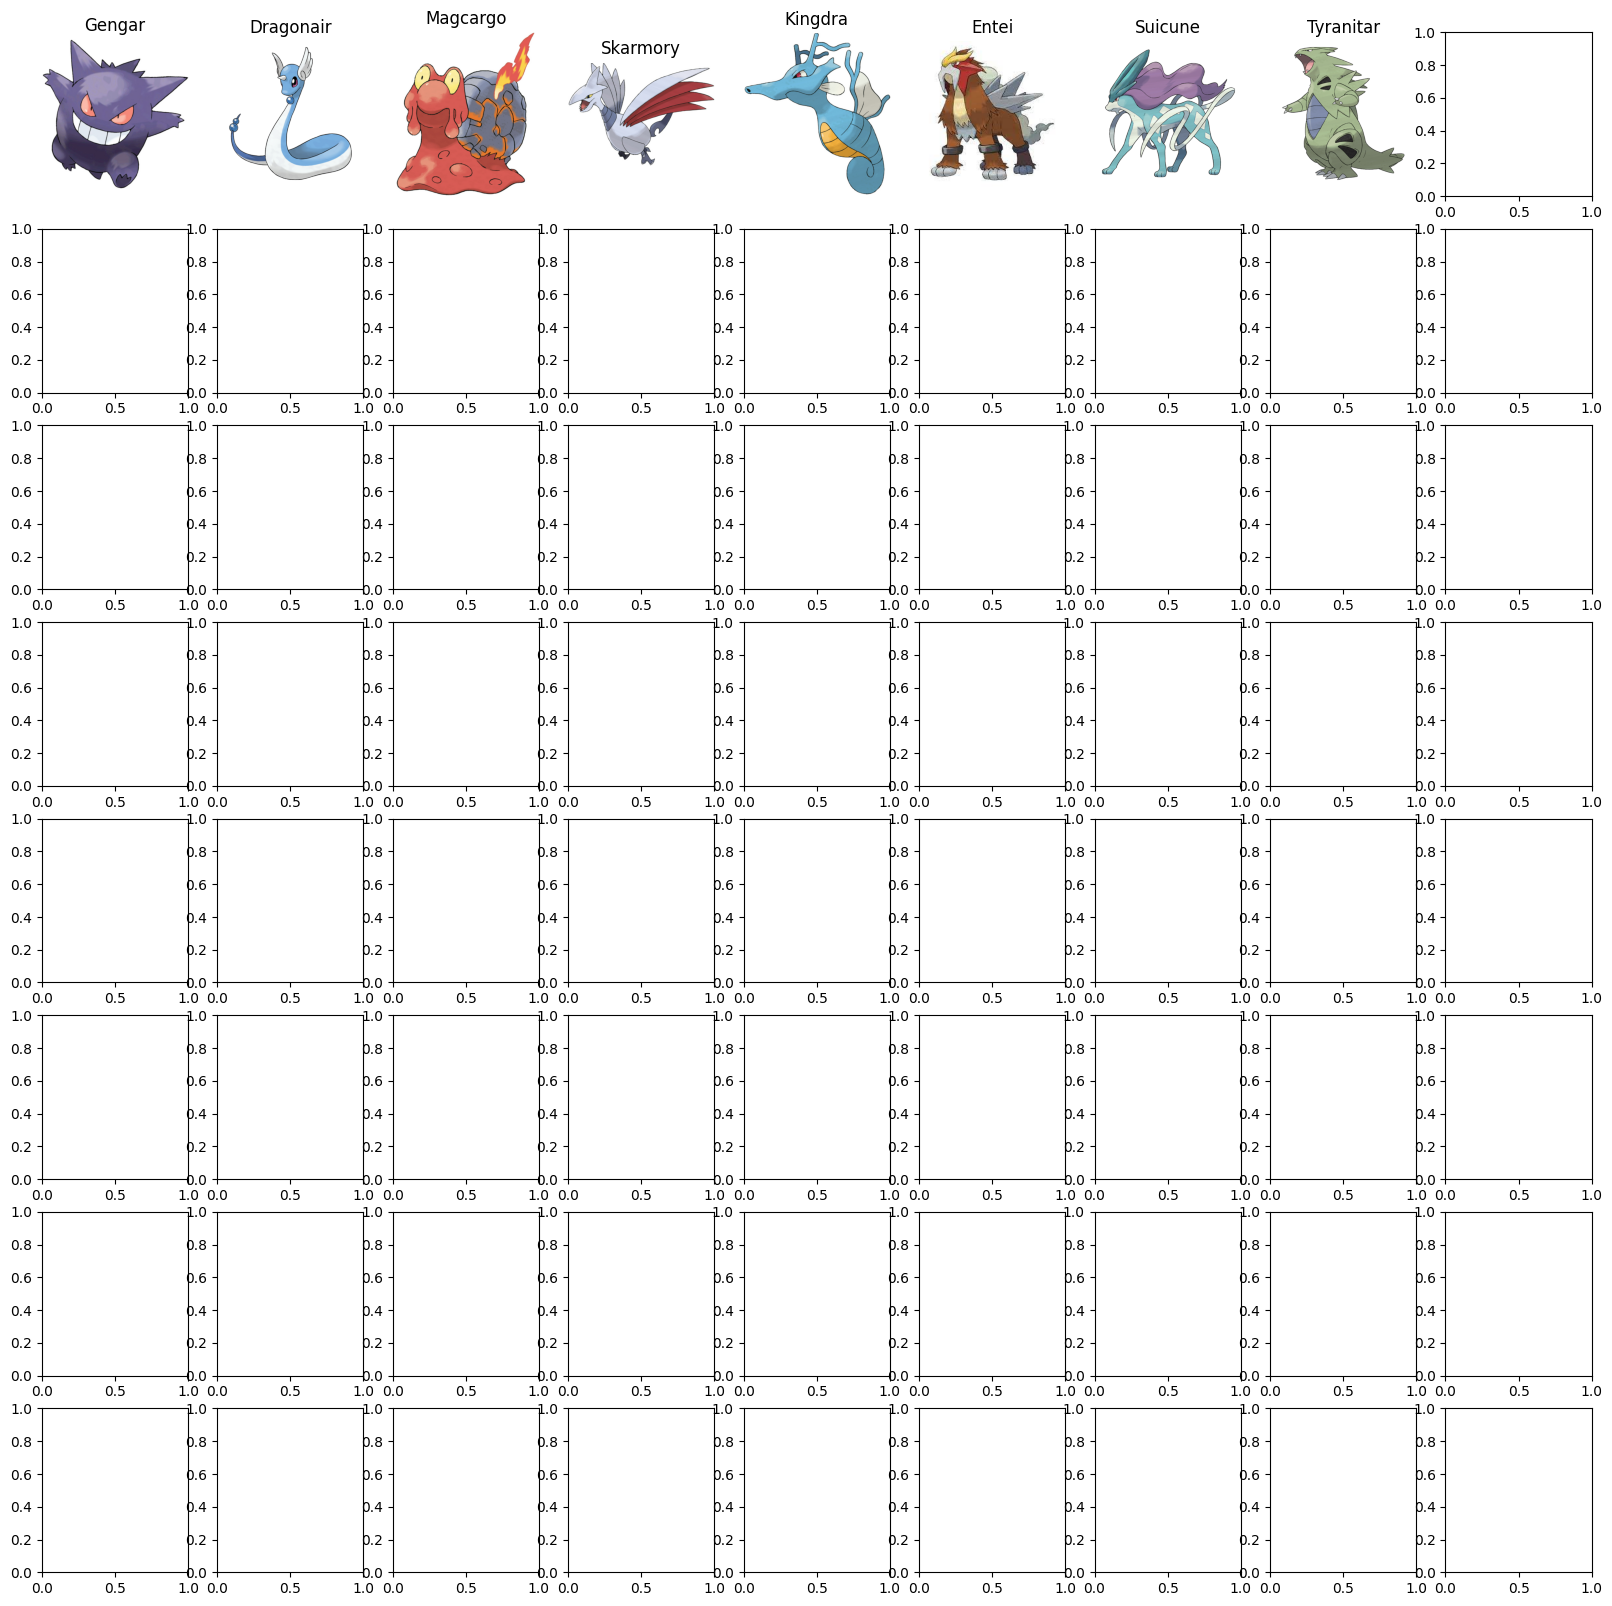

In [89]:
fig, ax = plt.subplots(8, 9, figsize=(20, 20))

for idx, poke in enumerate(real_legendary):
    image_path = get_poke_image(poke)
    image = plt.imread(image_path)
    ax[idx//9, idx%9].imshow(image)
    ax[idx//9, idx%9].axis("off")
    ax[idx//9, idx%9].set_title(poke)